# Общая часть

In [1]:
import pandas as pd
import string
import re
import datetime
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.DataFrame()
df['date_num']=list(range(18871, 19358, 1))
df['date']=pd.date_range('2021-09-01', '2022-12-31')
df=df.set_index('date_num')
df['num_posts']=0
df['num_c_with']=0
df['num_c']=0

In [3]:
def work_with_comments(comments):
    comments['clean_text']=''
    comments['keyword_i']=0
    i=0
    for i in range (len(comments)):
        c=0
        s=comments.iloc[i]['text']
        s=str(s)
        s=s.lower()
        for p in string.punctuation:
            if p in s:
                s=s.replace(p, '')
        s=s.replace('\n', ' ')
        comments.loc[i,'clean_text']=s
        c=bool(re.search(r'инфляц|цен', s))*bool(re.search(r'выс|выш|рост|раст', s))
        comments.loc[i,'keyword_i']=comments['keyword_i'][i]+c
    return comments

In [4]:
def work_with_df(posts, comments_res, df):
    i=0
    for i in range(len(posts)):
        if posts['post_time'][i]<1672531200:
            df.loc[posts['post_time'][i]//86400, 'num_posts']=df['num_posts'][posts['post_time'][i]//86400]+1
    i=0
    for i in range(len(comments)):
        if comments['comment_time'][i]<1672531200:
            df.loc[comments['comment_time'][i]//86400, 'num_c_with']=df['num_c_with'][comments['comment_time'][i]//86400]+comments['keyword_i'][i]
            df.loc[comments['comment_time'][i]//86400, 'num_c']=df['num_c'][comments['comment_time'][i]//86400]+1
    return df

# Коммерсант

In [5]:
comments=pd.read_csv('kommersant_comments.csv')
posts=pd.read_csv('kommersant_posts.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
18871,2021-09-01,1,1,1
18872,2021-09-02,1,1,10
18873,2021-09-03,0,0,0
18874,2021-09-04,0,0,0
18875,2021-09-05,1,0,0
...,...,...,...,...
19353,2022-12-27,0,0,0
19354,2022-12-28,2,0,11
19355,2022-12-29,0,0,0


# Ведомости

In [6]:
comments=pd.read_csv('vedomosti_comments.csv')
posts=pd.read_csv('vedomosti_posts.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
18871,2021-09-01,1,1,1
18872,2021-09-02,2,1,14
18873,2021-09-03,0,0,0
18874,2021-09-04,0,0,0
18875,2021-09-05,1,0,0
...,...,...,...,...
19353,2022-12-27,2,1,14
19354,2022-12-28,3,0,15
19355,2022-12-29,2,1,11


# Эксперт

In [7]:
comments=pd.read_csv('expert_comments.csv')
posts=pd.read_csv('expert_posts.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
18871,2021-09-01,2,4,7
18872,2021-09-02,2,2,15
18873,2021-09-03,1,0,1
18874,2021-09-04,0,0,1
18875,2021-09-05,1,0,1
...,...,...,...,...
19353,2022-12-27,2,1,14
19354,2022-12-28,3,0,15
19355,2022-12-29,2,1,11


# ТАСС

In [8]:
comments=pd.read_csv('tass_comments.csv')
posts=pd.read_csv('tass_posts.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
18871,2021-09-01,3,4,12
18872,2021-09-02,5,5,40
18873,2021-09-03,1,0,3
18874,2021-09-04,0,0,1
18875,2021-09-05,1,0,1
...,...,...,...,...
19353,2022-12-27,2,1,14
19354,2022-12-28,3,0,15
19355,2022-12-29,3,2,19


# Московский комсомолец

In [9]:
comments=pd.read_csv('mk_comments.csv')
posts=pd.read_csv('mk_posts.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
18871,2021-09-01,5,4,16
18872,2021-09-02,5,5,40
18873,2021-09-03,1,0,3
18874,2021-09-04,0,0,1
18875,2021-09-05,1,0,1
...,...,...,...,...
19353,2022-12-27,2,1,14
19354,2022-12-28,4,0,15
19355,2022-12-29,3,2,19


# Комсомольская правда

In [10]:
comments=pd.read_csv('kp_comments.csv')
posts=pd.read_csv('kp_posts.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
18871,2021-09-01,5,4,16
18872,2021-09-02,5,5,40
18873,2021-09-03,1,0,3
18874,2021-09-04,0,0,1
18875,2021-09-05,1,0,1
...,...,...,...,...
19353,2022-12-27,5,1,25
19354,2022-12-28,5,0,20
19355,2022-12-29,5,2,35


# Аргументы и факты

In [11]:
comments=pd.read_csv('aif_comments.csv')
posts=pd.read_csv('aif_posts.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
18871,2021-09-01,5,4,16
18872,2021-09-02,5,5,40
18873,2021-09-03,1,0,3
18874,2021-09-04,0,0,1
18875,2021-09-05,1,0,1
...,...,...,...,...
19353,2022-12-27,5,1,25
19354,2022-12-28,7,1,26
19355,2022-12-29,6,2,67


# Известия

In [12]:
comments=pd.read_csv('iz_comments.csv')
posts=pd.read_csv('iz_posts.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
18871,2021-09-01,5,4,16
18872,2021-09-02,5,5,40
18873,2021-09-03,1,0,3
18874,2021-09-04,0,0,1
18875,2021-09-05,1,0,1
...,...,...,...,...
19353,2022-12-27,7,1,39
19354,2022-12-28,8,1,40
19355,2022-12-29,7,2,73


# Вести

In [13]:
comments=pd.read_csv('vesti_comments.csv')
posts=pd.read_csv('vesti_posts.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
18871,2021-09-01,5,4,16
18872,2021-09-02,5,5,40
18873,2021-09-03,1,0,3
18874,2021-09-04,0,0,1
18875,2021-09-05,1,0,1
...,...,...,...,...
19353,2022-12-27,7,1,39
19354,2022-12-28,8,1,40
19355,2022-12-29,8,3,97


# Life.ru

In [14]:
comments=pd.read_csv('life_comments.csv')
posts=pd.read_csv('life_posts.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
18871,2021-09-01,5,4,16
18872,2021-09-02,6,5,53
18873,2021-09-03,1,0,3
18874,2021-09-04,0,0,1
18875,2021-09-05,1,0,1
...,...,...,...,...
19353,2022-12-27,7,1,39
19354,2022-12-28,8,1,40
19355,2022-12-29,8,3,97


# Индикатор

In [15]:
df=df[df['date']!='2023-02-01']
df['indicator']=df['num_c_with']/df['num_posts']
df['date_num']=df.index
df=df.set_index('date')
df['date']=df.index

In [16]:
df

,num_posts,num_c_with,num_c,indicator,date_num,date
date,,,,,,
2021-09-01,5,4,16,0.800000,18871,2021-09-01
2021-09-02,6,5,53,0.833333,18872,2021-09-02
2021-09-03,1,0,3,0.000000,18873,2021-09-03
2021-09-04,0,0,1,NaN,18874,2021-09-04
2021-09-05,1,0,1,0.000000,18875,2021-09-05
...,...,...,...,...,...,...
2022-12-27,7,1,39,0.142857,19353,2022-12-27
2022-12-28,8,1,40,0.125000,19354,2022-12-28
2022-12-29,8,3,97,0.375000,19355,2022-12-29


In [17]:
df.to_csv('indicator.csv', index=False)

In [18]:
import matplotlib
from matplotlib import pyplot as plt

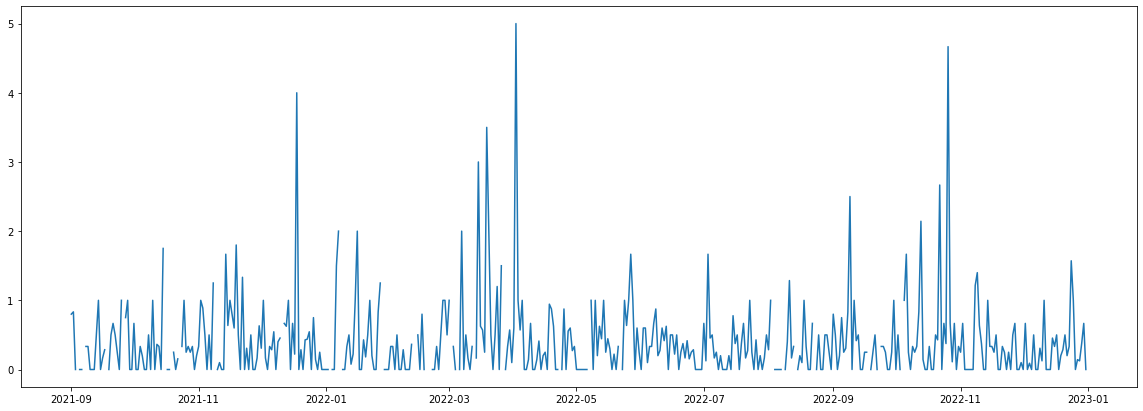

In [19]:
plt.figure(figsize=(20, 7))
plt.plot(df['indicator'])